<Figure size 504x504 with 0 Axes>

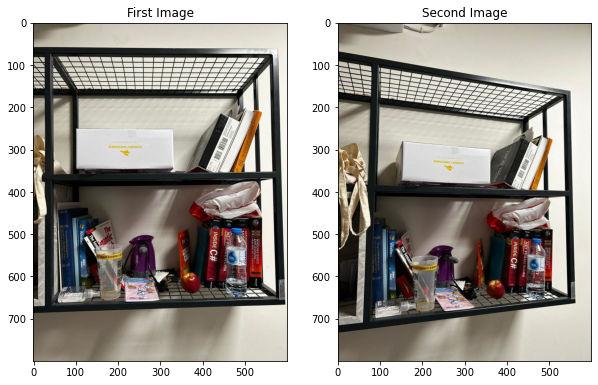

In [1]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from numpy.linalg import norm
from operator import itemgetter

def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

url1 = 'https://i.imghippo.com/files/oL3031ps.jpg'
url2 = 'https://i.imghippo.com/files/OIrU9746wkE.jpg'

colorimg1 = io.imread(url1)
colorimg2 = io.imread(url2)

plt.figure(figsize = (7,7))
plot_image(colorimg1, colorimg2, title_1="First Image",title_2="Second Image")

In [2]:
imgL = cv2.cvtColor(colorimg1, cv2.COLOR_BGR2GRAY)
imgR = cv2.cvtColor(colorimg2, cv2.COLOR_BGR2GRAY)

<Figure size 576x576 with 0 Axes>

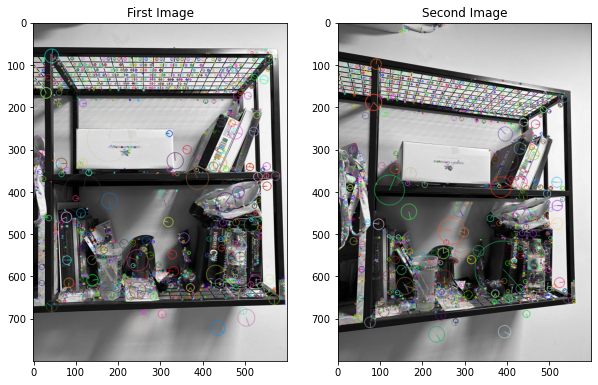

In [3]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(imgL, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(imgR, None)

image1=cv2.drawKeypoints(imgL,keypoints_1,colorimg1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2=cv2.drawKeypoints(imgR,keypoints_2,colorimg2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (8,8))
plot_image(image1, image2, title_1="First Image",title_2="Second Image")

In [4]:
matches = []
for id1 in range(len(descriptors_1)):
    desc1 = descriptors_1[id1]
    similarities = []
    for id2 in range(len(descriptors_2)):
        desc2 = descriptors_2[id2]
        cosine_similarity = np.dot(desc1,desc2)/(norm(desc1)*norm(desc2))
        similarities.append((id2, cosine_similarity))
    similarities = sorted(similarities, key=itemgetter(1), reverse=True)
    matches.append((id1, similarities[0:2]))

In [5]:
eliminated_matches = []
for i, match in matches:
    if match[0][1] / match[1][1] < 1.030:
        eliminated_matches.append((i, match[0][0]))

In [6]:
translations_x = []
translations_y = []
for id1, id2 in eliminated_matches:
    left_keypoint_pos = keypoints_1[id1].pt
    right_keypoint_pos = keypoints_2[id2].pt
    
    distance_x = right_keypoint_pos[0] - left_keypoint_pos[0]
    distance_y = right_keypoint_pos[1] - left_keypoint_pos[1]
    
    translations_x.append(distance_x)
    translations_y.append(distance_y)

mean_dx = np.mean(translations_x)
mean_dy = np.mean(translations_y)

final_matches = []
for i, (id1, id2) in enumerate(eliminated_matches):
    dx, dy = translations_x[i], translations_y[i]
    
    if abs(dx - mean_dx) < 30 and abs(dy - mean_dy) < 30:
        final_matches.append(cv2.DMatch(_queryIdx=id1, _trainIdx=id2, _distance=0))
        
print(len(final_matches))
print(final_matches)

47
[< cv2.DMatch 000001BE56D7D170>, < cv2.DMatch 000001BE56DAFC70>, < cv2.DMatch 000001BE56DAFE70>, < cv2.DMatch 000001BE56DAFE10>, < cv2.DMatch 000001BE56DAFE30>, < cv2.DMatch 000001BE56DAFD10>, < cv2.DMatch 000001BE56DAFDF0>, < cv2.DMatch 000001BE56DAFDD0>, < cv2.DMatch 000001BE56DAFDB0>, < cv2.DMatch 000001BE56DAFD70>, < cv2.DMatch 000001BE56DAFD50>, < cv2.DMatch 000001BE56DAFD90>, < cv2.DMatch 000001BE56DAFC90>, < cv2.DMatch 000001BE56DAFD30>, < cv2.DMatch 000001BE56DAFCD0>, < cv2.DMatch 000001BE56DAFCF0>, < cv2.DMatch 000001BE56DAFC50>, < cv2.DMatch 000001BE56DAFED0>, < cv2.DMatch 000001BE56DAFEB0>, < cv2.DMatch 000001BE56DAFF10>, < cv2.DMatch 000001BE56DAFEF0>, < cv2.DMatch 000001BE56DAFF30>, < cv2.DMatch 000001BE56DAFE90>, < cv2.DMatch 000001BE56DAFF70>, < cv2.DMatch 000001BE56DAFF50>, < cv2.DMatch 000001BE56DAFFD0>, < cv2.DMatch 000001BE56DAFFB0>, < cv2.DMatch 000001BE56DB0050>, < cv2.DMatch 000001BE56DB0070>, < cv2.DMatch 000001BE56DAFF90>, < cv2.DMatch 000001BE56DB00B0>, < cv

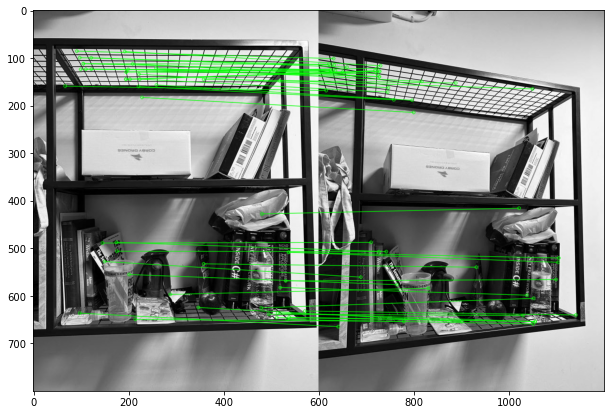

In [7]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = None,
                   flags = 2)
matched_img = cv2.drawMatches(imgL,keypoints_1,imgR,keypoints_2,final_matches,None,**draw_params)
plt.figure(figsize = (14,7))
plt.imshow(matched_img, 'gray'),
plt.show()